In [22]:
import pandas as pd

In [23]:
df=pd.read_csv(r'L:\Coding_project\Energy_grid_new\load_pred\training_data\base_bld\BLD_Sum.csv',index_col=0)

In [24]:
df.index=pd.to_datetime(df.index)

In [25]:
df.columns

Index(['RealPower', 'RealPower_before_scaling', 'is_holiday', 'hour_cos',
       'hour_sin', 'dayofweek_cos', 'dayofweek_sin', 'quarter_cos',
       'quarter_sin', 'month_cos', 'month_sin', 'dayofmonth_cos',
       'dayofmonth_sin', 'temp', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h',
       'snow_1h', 'snow_3h', 'clouds_all', 'weather_main', 'RealPower_-0d_0h'],
      dtype='object')

In [26]:
df=df[pd.Timestamp(2017,1,1,0,0):pd.Timestamp(2018,12,31,23,45)]

In [27]:
df['month']=df.index.month

In [28]:
df

,RealPower,RealPower_before_scaling,is_holiday,hour_cos,hour_sin,dayofweek_cos,dayofweek_sin,quarter_cos,quarter_sin,month_cos,...,wind_speed,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_main,RealPower_-0d_0h,month
DateTime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:15:00,51.7251,517.251,0,1.000000,0.000000,0.62349,-0.781831,6.120000e-17,1.000000e+00,0.866025,...,4.6,200.0,0.42,NaN,NaN,NaN,90.0,8.0,51.7251,1
2017-01-01 00:30:00,53.0934,530.934,0,1.000000,0.000000,0.62349,-0.781831,6.120000e-17,1.000000e+00,0.866025,...,4.6,200.0,0.42,NaN,NaN,NaN,90.0,8.0,53.0934,1
2017-01-01 00:45:00,52.5827,525.827,0,1.000000,0.000000,0.62349,-0.781831,6.120000e-17,1.000000e+00,0.866025,...,4.6,200.0,0.42,NaN,NaN,NaN,90.0,8.0,52.5827,1
2017-01-01 01:00:00,53.2716,532.716,0,0.965926,0.258819,0.62349,-0.781831,6.120000e-17,1.000000e+00,0.866025,...,4.1,280.0,2.00,NaN,NaN,NaN,90.0,8.0,53.2716,1
2017-01-01 01:15:00,53.0779,530.779,0,0.965926,0.258819,0.62349,-0.781831,6.120000e-17,1.000000e+00,0.866025,...,4.1,280.0,2.00,NaN,NaN,NaN,90.0,8.0,53.0779,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 22:45:00,52.8584,528.584,0,0.866025,-0.500000,1.00000,0.000000,1.000000e+00,-2.450000e-16,1.000000,...,6.7,220.0,0.25,NaN,NaN,NaN,90.0,8.0,52.8584,12
2018-12-31 23:00:00,52.2641,522.641,0,0.965926,-0.258819,1.00000,0.000000,1.000000e+00,-2.450000e-16,1.000000,...,4.1,230.0,NaN,NaN,NaN,NaN,75.0,2.0,52.2641,12
2018-12-31 23:15:00,52.0479,520.479,0,0.965926,-0.258819,1.00000,0.000000,1.000000e+00,-2.450000e-16,1.000000,...,4.1,230.0,NaN,NaN,NaN,NaN,75.0,2.0,52.0479,12


In [29]:
to_concat=[]
for month in range(1,13):
    to_concat.append(df[df.month==month].corr()['RealPower'])

In [30]:
to_concat

[RealPower                   1.000000
 RealPower_before_scaling    1.000000
 is_holiday                 -0.198684
 hour_cos                   -0.440662
 hour_sin                   -0.468905
 dayofweek_cos              -0.122470
 dayofweek_sin               0.310325
 quarter_cos                      NaN
 quarter_sin                      NaN
 month_cos                        NaN
 month_sin                        NaN
 dayofmonth_cos             -0.146299
 dayofmonth_sin             -0.234425
 temp                       -0.166530
 feels_like                 -0.178387
 temp_min                   -0.164080
 temp_max                   -0.144131
 pressure                    0.019710
 humidity                   -0.049978
 wind_speed                 -0.008805
 wind_deg                   -0.140770
 rain_1h                    -0.070092
 rain_3h                    -0.121735
 snow_1h                          NaN
 snow_3h                          NaN
 clouds_all                 -0.097444
 weather_mai

In [31]:


# Assuming your dataframe is called 'df' with datetime index
correlation_df = df.corr()['RealPower']

# Print the Pearson correlation between 'RealPower' and other columns
print(correlation_df)

# Calculate the maximum and average value of other columns
max_values = df.max()
avg_values = df.mean()

# Calculate the Pearson correlation between 'RealPower' and the maximum value of other columns
max_correlation = df['RealPower'].corr(max_values)

# Calculate the Pearson correlation between 'RealPower' and the average value of other columns
avg_correlation = df['RealPower'].corr(avg_values)

# Print the Pearson correlation between 'RealPower' and the maximum and average value of other columns
print("Pearson correlation with maximum values:", max_correlation)
print("Pearson correlation with average values:", avg_correlation)


RealPower                   1.000000
RealPower_before_scaling    1.000000
is_holiday                 -0.140085
hour_cos                   -0.460718
hour_sin                   -0.426935
dayofweek_cos              -0.076569
dayofweek_sin               0.356144
quarter_cos                -0.030775
quarter_sin                 0.152925
month_cos                   0.030229
month_sin                   0.110460
dayofmonth_cos             -0.051865
dayofmonth_sin              0.090367
temp                       -0.130470
feels_like                 -0.137305
temp_min                   -0.119851
temp_max                   -0.115256
pressure                    0.101362
humidity                   -0.028713
wind_speed                 -0.096559
wind_deg                   -0.155450
rain_1h                    -0.077299
rain_3h                    -0.160548
snow_1h                          NaN
snow_3h                          NaN
clouds_all                  0.084560
weather_main                0.079184
R

In [32]:
correlation_df = df.corr()['RealPower']

In [33]:
corr_df=pd.concat(to_concat,axis=1)

In [34]:
corr_df.columns=['1','2','3','4','5','6','7','8','9','10','11','12']

In [35]:
corr_df.index

Index(['RealPower', 'RealPower_before_scaling', 'is_holiday', 'hour_cos',
       'hour_sin', 'dayofweek_cos', 'dayofweek_sin', 'quarter_cos',
       'quarter_sin', 'month_cos', 'month_sin', 'dayofmonth_cos',
       'dayofmonth_sin', 'temp', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h',
       'snow_1h', 'snow_3h', 'clouds_all', 'weather_main', 'RealPower_-0d_0h',
       'month'],
      dtype='object')

In [36]:
corr_df=corr_df.drop(index=['RealPower', 'RealPower_before_scaling', 'is_holiday','quarter_cos',
       'quarter_sin','month_cos', 'month_sin','wind_speed', 'wind_deg', 'month',
       'rain_1h', 'rain_3h',
       'snow_1h', 'snow_3h', 'clouds_all', 'weather_main', 'RealPower_-0d_0h',])

In [37]:
corr_df_abs=abs(corr_df)

In [38]:
corr_df_abs=corr_df_abs.T

In [39]:
corr_df_abs.columns

Index(['hour_cos', 'hour_sin', 'dayofweek_cos', 'dayofweek_sin',
       'dayofmonth_cos', 'dayofmonth_sin', 'temp', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'humidity'],
      dtype='object')

In [40]:
corr_df_abs=corr_df_abs.rename(columns={'hour_cos':'$HoD_{cos}$','hour_sin':'$HoD_{sin}$', 'dayofweek_cos':'$DoW_{cos}$', 'dayofweek_sin':'$DoW_{sin}$',
       'dayofmonth_cos':'$DoM_{cos}$', 'dayofmonth_sin':'$DoM_{sin}$', 'temp':'$T$', 'feels_like':'$T_f$', 'temp_min':'$T_{min}$',
       'temp_max':'$T_{max}$', 'pressure':'$p$', 'humidity':'$hum$'})
corr_df_abs=corr_df_abs.T

In [41]:
import warnings
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

rc_={
    "figure.dpi":600,
    "font.size":10,
    "axes.facecolor":"white",
    "savefig.facecolor":"white",
    "text.usetex":False,
    "legend.frameon":False
}
plt.rcParams.update(rc_)

#from utils.plot_utils import *
#customize_plt() # customize plt configs, see plot_utils
import seaborn as sns
%matplotlib inline
sns.set(font_scale=1)
from plot_helper import *

Text(248.89999999999995, 0.5, 'Covariates')

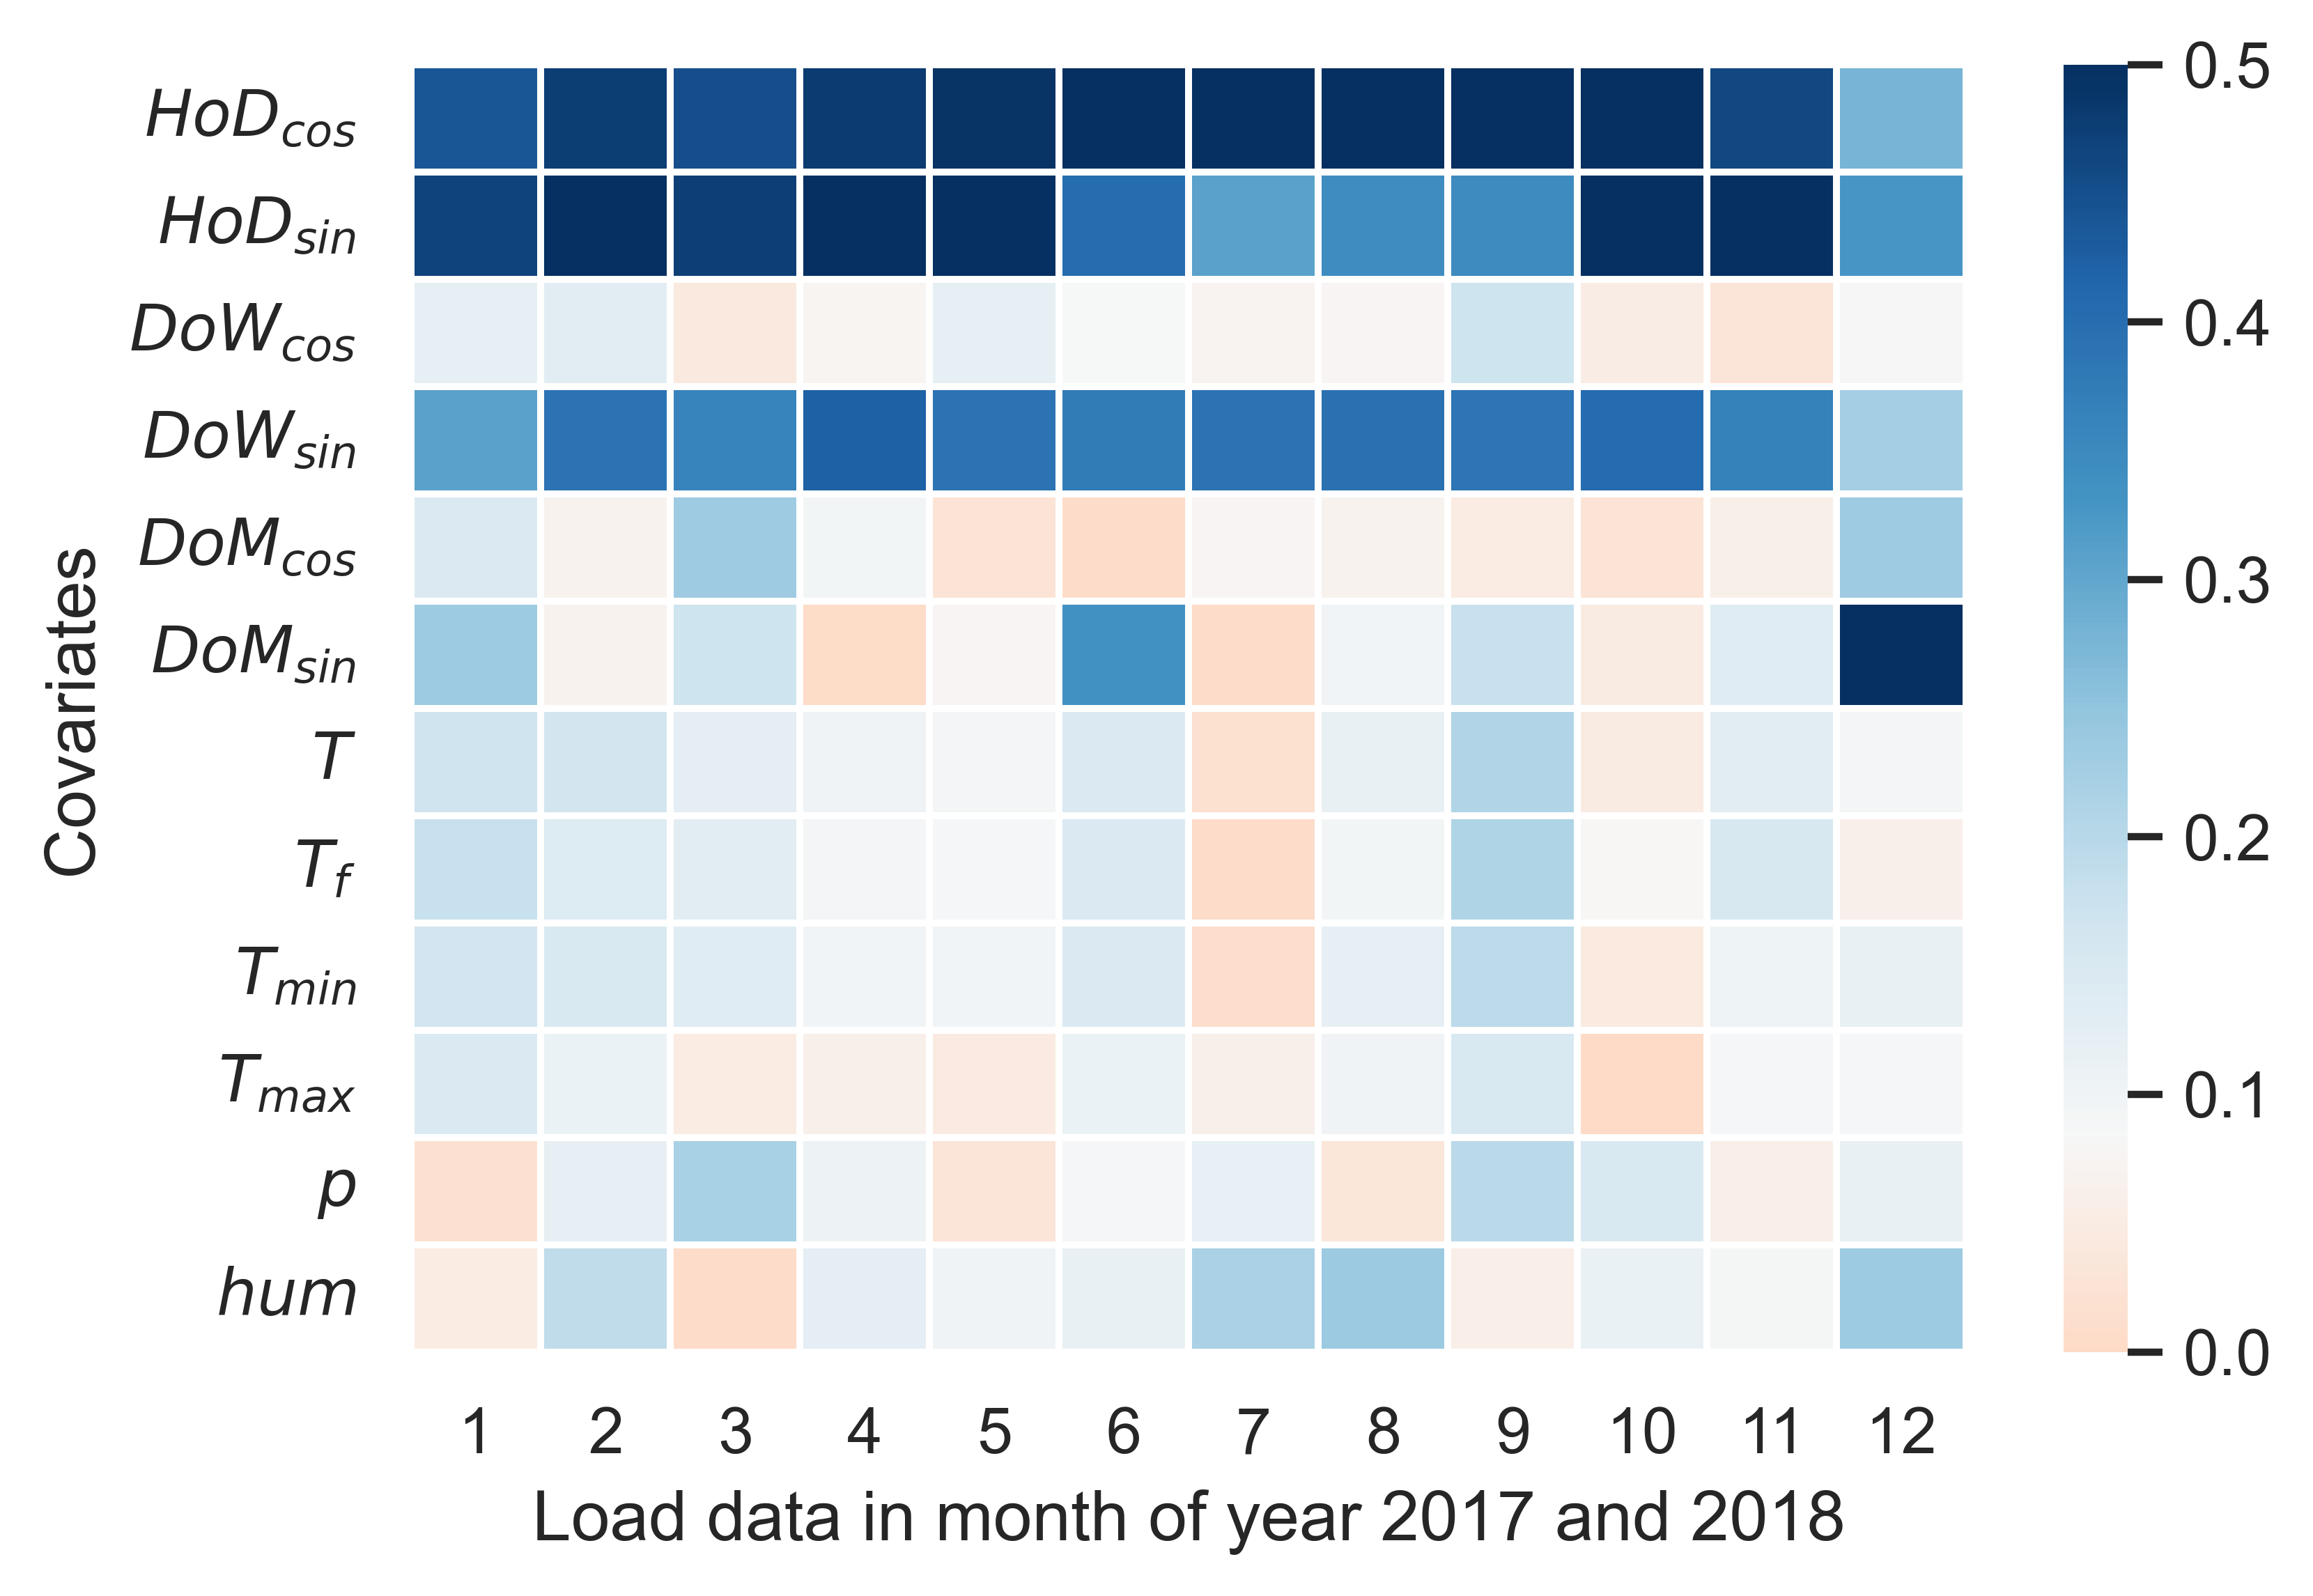

In [42]:
#fig,ax= plt.subplot(figsize=(9, 3.5))  # 创建画布
import matplotlib.gridspec as gridspec  # 用网格来创建子图
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib

fig,ax=plt.subplots(1,figsize=[6,4])

'''ax5.xaxis.set_ticks([])
ax5.yaxis.set_ticks([])
ax5.set_facecolor('bisque')
ax5.text(1,0.2,'$<$0',fontsize=15)'''

def truncate_colormap(cmapIn='jet', minval=0.0, maxval=1.0, n=100):
    '''truncate_colormap(cmapIn='jet', minval=0.0, maxval=1.0, n=100)'''
    cmapIn = plt.get_cmap(cmapIn)

    new_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmapIn.name, a=minval, b=maxval),
        cmapIn(np.linspace(minval, maxval, n)))

    return new_cmap

#cmap=sns.truncate_colormap("RdBu",as_cmap=True)
#cmap.set_over('b')
#cmap.set_under('bisque')
cmap=truncate_colormap("RdBu",0.4,1,120)

#sns.heatmap(ax=ax1,data=pv_dc,square=False,vmin=0,vmax=100,cmap=cmap,linewidths=1,cbar=False,xticklabels=False) 
sns.heatmap(ax=ax,data=corr_df_abs,square=False,vmin=0,vmax=0.5,annot=False,cmap=cmap,linewidths=1,cbar=True,
            ) 

ax.set_xlabel("Load data in month of year 2017 and 2018",fontsize=label_fs)
ax.set_ylabel("Covariates",fontsize=label_fs)